<a href="https://colab.research.google.com/github/shubham2007-pro/5CS037/blob/main/Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving diabetes_.csv to diabetes_ (1).csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



1.Load the Dataset: • Read the dataset into a pandas DataFrame. • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).

In [9]:
df = pd.read_csv("diabetes_.csv")
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [11]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [12]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


2.Handle Missing Data: • Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [13]:
# Replace zero values with NaN for medical features
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)


# Fill missing values with mean
for col in zero_cols:
 df[col].fillna(df[col].mean())


print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


3.Feature Engineering: • Separate the feature matrix (X) and target variable (y). • Perform a train - test split from scratch using a 70% − 30% ratio

In [14]:


# Separate features and target
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values


In [15]:

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)

    test_idx = indices[:test_size]
    train_idx = indices[test_size:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


4.Implement KNN: • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN). • Compute distances using Euclidean distance. • Write functions for: – Predicting the class for a single query. – Predicting classes for all test samples. • Evaluate the performance using accuracy.

In [16]:
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (538, 8)
X_test shape: (230, 8)
y_train shape: (538,)
y_test shape: (230,)


In [17]:

#Implement KNN from Scratch
def euclidean_distance(p1, p2):
 return np.sqrt(np.sum((p1 - p2) ** 2))


single point

In [18]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]

    return max(set(labels), key=labels.count)


predicting all samples

In [19]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = []

    for x in X_test:
        predictions.append(knn_predict_single(x, X_train, y_train, k))

    return np.array(predictions)

Accuracy Function

In [20]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

Model Evaluation

In [21]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy (k=3): {accuracy:.2f}%")


Accuracy (k=3): 65.22%


Problem 2:

In [22]:
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [23]:

X_scaled = min_max_scaling(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [24]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy without scaling: {accuracy:.2f}%")
print(f"Accuracy with scaling: {acc_scaled:.2f}%")

Accuracy without scaling: 65.22%
Accuracy with scaling: 65.22%


Problem 3

In [25]:
import time
k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

In [26]:
for k in k_values:
    # Original
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    # Scaled
    start = time.time()
    pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, pred_s))


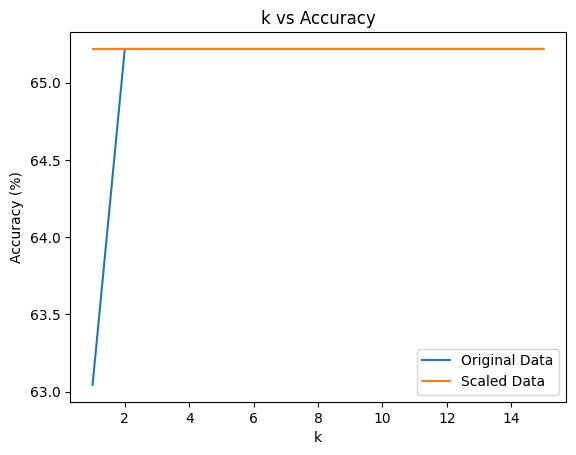

In [27]:
plt.figure()
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("k vs Accuracy")
plt.show()

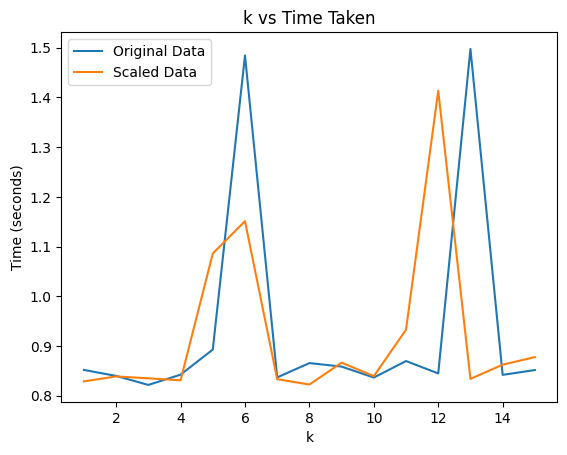

In [28]:
plt.figure()
plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.title("k vs Time Taken")
plt.show()
